In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns

In [3]:
# Load Data

df = pd.read_csv("data_processed.csv")

df.head(10)

,ID,Player,Win,Game,PA,AB,Run,H,2B,3B,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,aaronha01,Henry Aaron(1954~1976),1692,3234,13666,12121,2128,3703,614,96,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,aaronto01,Tommie Aaron(1962~1971),161,373,1045,944,99,216,42,6,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,abbotje01,Jeff Abbott(1997~2001),98,212,651,596,82,157,33,2,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,abbotku01,Kurt Abbott(1993~2001),308,665,2227,2044,268,523,109,23,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,aberal01,Al Aber(1950~1957),33,67,116,99,5,13,0,0,...,0.000000,0.000000,0.068966,0.000000,0.000000,0.008621,-0.588,21,-0.028000,0.321091
5,abercre01,Reggie Abercrombie(2006~2008),63,140,421,386,56,86,20,2,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
6,abernbr01,Brent Abernathy(2001~2005),91,230,955,868,97,212,36,5,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
7,abernte02,Ted Abernathy(1955~1972),104,156,204,180,12,25,3,0,...,0.000000,0.000000,0.034314,0.000000,0.009804,0.000000,-0.696,38,-0.018316,0.333565
8,aberscl01,Cliff Aberson(1947~1949),24,63,205,179,25,45,7,3,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
9,abnersh01,Shawn Abner(1987~1992),157,323,902,840,81,191,39,4,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326


In [4]:
print(df.columns)

Index(['ID', 'Player', 'Win', 'Game', 'PA', 'AB', 'Run', 'H', '2B', '3B', 'HR',
       'BB', 'SF', 'HBP', 'SB', 'Date_min', 'Date_max', '1B', 'XBH', 'AVG',
       'SLG', 'OBP', 'OPS', 'Hard_Hit_Efficiency', 'Speed_Score',
       'Runs_per_PA', '1B_per_PA', '2B_per_PA', '3B_per_PA', 'HR_per_PA',
       'BB_per_PA', 'SB_per_PA', 'HBP_per_PA', 'SF_per_PA', 'WPA_total',
       'High_Leverage_PA_total', 'WPA_per_High_Leverage_PA',
       'Hits_Rolling_Std'],
      dtype='object')


In [10]:

id = ["ID", "Player"]
y = ["Runs_per_PA"]
exclude = ["Win", "Game", "Date_min", "Date_max"]


In [11]:
# Choose attributes

y_data = df.loc[:, y]
x_data = df.drop(columns=id + y + exclude)

x_data.head(10)

,PA,AB,Run,H,2B,3B,HR,BB,SF,HBP,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,13666,12121,2128,3703,614,96,740,1372,120.0,32,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,1045,944,99,216,42,6,13,85,6.0,0,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,651,596,82,157,33,2,18,38,7.0,3,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,2227,2044,268,523,109,23,62,133,12.0,17,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,116,99,5,13,0,0,0,8,1.0,0,...,0.000000,0.000000,0.068966,0.000000,0.000000,0.008621,-0.588,21,-0.028000,0.321091
5,421,386,56,86,20,2,9,21,2.0,7,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
6,955,868,97,212,36,5,8,60,4.0,7,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
7,204,180,12,25,3,0,0,7,0.0,2,...,0.000000,0.000000,0.034314,0.000000,0.009804,0.000000,-0.696,38,-0.018316,0.333565
8,205,179,25,45,7,3,5,26,0.0,0,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
9,902,840,81,191,39,4,11,43,7.0,7,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326


In [17]:
# Correlation

cor_matrix = x_data.corr()

cor_matrix.head(len(x_data.columns))

,PA,AB,Run,H,2B,3B,HR,BB,SF,HBP,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
PA,1.000000,0.999133,0.983414,0.994255,0.976900,0.812844,0.826310,0.930713,0.826924,0.728746,...,0.179133,0.391936,0.338554,0.266752,0.073900,0.240863,-0.069738,0.985313,0.360075,0.561253
AB,0.999133,1.000000,0.979482,0.995017,0.976719,0.814959,0.818954,0.915287,0.827141,0.724395,...,0.181958,0.388418,0.319634,0.268749,0.071580,0.242179,-0.087306,0.985276,0.358670,0.565650
Run,0.983414,0.979482,1.000000,0.985537,0.974508,0.832742,0.851318,0.945135,0.795308,0.729859,...,0.203017,0.413939,0.363265,0.297949,0.085160,0.215696,0.035658,0.959202,0.366131,0.556524
H,0.994255,0.995017,0.985537,1.000000,0.982826,0.834515,0.815303,0.913351,0.809304,0.716379,...,0.202111,0.381415,0.318856,0.271674,0.070648,0.226397,-0.035011,0.977878,0.366785,0.575670
2B,0.976900,0.976719,0.974508,0.982826,1.000000,0.792999,0.837622,0.906421,0.816801,0.737706,...,0.174570,0.419144,0.326451,0.241250,0.096691,0.244362,-0.027798,0.960324,0.362567,0.566281
3B,0.812844,0.814959,0.832742,0.834515,0.792999,1.000000,0.534618,0.730394,0.477971,0.492826,...,0.456515,0.185325,0.252318,0.350395,0.001284,0.041278,0.033278,0.780814,0.323228,0.512932
HR,0.826310,0.818954,0.851318,0.815303,0.837622,0.534618,1.000000,0.845624,0.808236,0.687186,...,0.034344,0.627205,0.351625,0.108255,0.123532,0.288512,0.112734,0.833454,0.308578,0.421625
BB,0.930713,0.915287,0.945135,0.913351,0.906421,0.730394,0.845624,1.000000,0.765067,0.678094,...,0.146186,0.420941,0.497433,0.229369,0.069812,0.215477,0.112497,0.913521,0.360041,0.494551
SF,0.826924,0.827141,0.795308,0.809304,0.816801,0.477971,0.808236,0.765067,1.000000,0.667463,...,-0.012280,0.443919,0.264506,0.188445,0.109217,0.491513,-0.083441,0.846765,0.281288,0.405397
HBP,0.728746,0.724395,0.729859,0.716379,0.737706,0.492826,0.687186,0.678094,0.667463,1.000000,...,0.060738,0.407155,0.262850,0.204991,0.436075,0.246965,-0.054965,0.712095,0.279566,0.427581


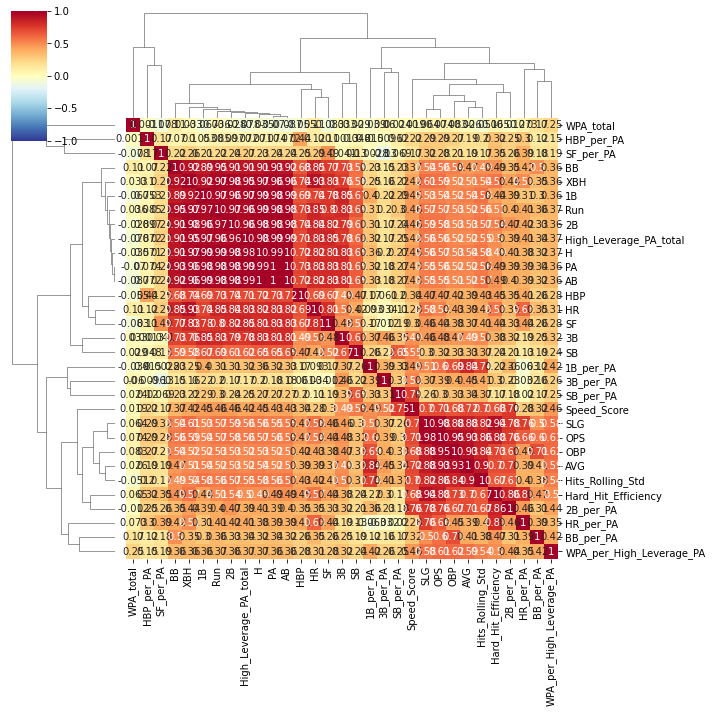

In [25]:
# Correaltion 


sns.clustermap(cor_matrix, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)


In [27]:
# Scaler

scaler = StandardScaler()
scaler.fit(x_data)
scaled_x_data = pd.DataFrame(scaler.transform(x_data), columns=x_data.columns)

scaled_x_data.head(10)

,PA,AB,Run,H,2B,3B,HR,BB,SF,HBP,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,5.120379,5.125803,6.253733,5.629855,4.993040,4.151700,9.089246,5.078232,6.037119,0.971877,...,0.305171,2.811554,0.875546,0.567208,-0.568864,1.064021,7.065839,4.997707,1.247265,1.189244
1,-0.346825,-0.342008,-0.375730,-0.371146,-0.324599,-0.309132,-0.357903,-0.307929,-0.230432,-0.575866,...,0.041387,-0.196904,0.280390,-0.101921,-0.945678,0.352709,-1.487614,-0.228922,-0.826501,0.093181
2,-0.517499,-0.512250,-0.431275,-0.472683,-0.408268,-0.507391,-0.292929,-0.504626,-0.175454,-0.430765,...,-0.507400,0.900164,-0.436966,-0.056750,-0.204096,1.525492,0.625099,-0.559491,0.995620,0.833496
3,0.165198,0.196114,0.176453,0.157190,0.298271,0.533469,0.278838,-0.107046,0.099439,0.246373,...,0.984222,0.913896,-0.394806,-0.074388,0.282744,0.270044,0.439001,0.109455,0.720913,0.461406
4,-0.749252,-0.755383,-0.682862,-0.720502,-0.715055,-0.606521,-0.526834,-0.630178,-0.505325,-0.575866,...,-1.138989,-1.094215,-0.106091,-0.745856,-0.945678,1.026522,0.258718,-0.723474,-1.194186,-2.559002
5,-0.617131,-0.614983,-0.516227,-0.594872,-0.529124,-0.507391,-0.409882,-0.575772,-0.450346,-0.237297,...,-0.162351,0.447757,-0.702148,1.740492,1.730005,0.120769,0.072620,-0.689636,-1.365936,0.161780
6,-0.385811,-0.379187,-0.382265,-0.378030,-0.380378,-0.358697,-0.422876,-0.412555,-0.340389,-0.237297,...,-0.062642,-0.489984,-0.297808,0.898258,0.233864,-0.010787,-0.796807,-0.320024,-0.483605,1.167384
7,-0.711132,-0.715758,-0.659990,-0.699850,-0.687165,-0.606521,-0.526834,-0.634363,-0.560303,-0.479132,...,-1.138989,-1.094215,-1.188366,-0.745856,0.632001,-0.991054,0.213855,-0.679224,-0.520963,-2.479872
8,-0.710699,-0.716247,-0.617515,-0.665431,-0.649979,-0.457826,-0.461860,-0.554847,-0.560303,-0.575866,...,1.869532,0.665054,1.701159,-0.745856,-0.945678,-0.991054,0.608898,-0.726077,1.638658,0.425055
9,-0.408770,-0.392885,-0.434543,-0.414170,-0.352489,-0.408262,-0.383892,-0.483701,-0.175454,-0.237297,...,-0.227316,-0.214580,-0.771154,-0.248508,0.303172,0.825212,-0.143802,-0.377288,0.049457,-0.413466


In [28]:
# PCA

pca = PCA()
pca.fit(scaled_x_data)
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)

[5.22782059e-01 1.35530356e-01 7.87491651e-02 4.42096689e-02
 4.19598797e-02 3.08283259e-02 2.99141953e-02 2.46323021e-02
 2.00304076e-02 1.57473498e-02 1.54373003e-02 1.16733805e-02
 7.77582037e-03 6.45168383e-03 4.36910465e-03 3.43064975e-03
 2.60641918e-03 1.73855836e-03 1.08416432e-03 5.90728020e-04
 1.63120895e-04 1.56514398e-04 1.06536979e-04 2.24747601e-05
 8.51849544e-06 6.77570422e-07 6.38122758e-07 1.20444994e-31
 4.29621838e-33 4.29621838e-33 2.36558557e-33]
